In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('Tidal_range_Dataset_2025.csv')

### Part 1a: Environmental Data and Tidal Resource

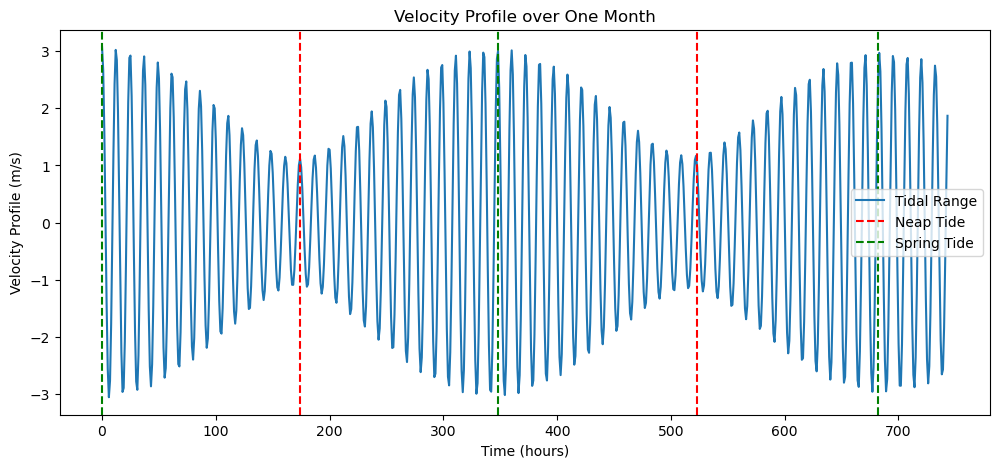

In [3]:
Fzu = 0
M2 = 2.0910
S2 = 0.5610
K2 = 0.4182
spring = 5.2
neap = 3

T_M2 = 12.42
T_S2 = 12
T_K2 = 11.97


t = np.linspace(0, 365*24, 365*24)
v = M2 * np.cos((2*np.pi/ T_M2) * t) + S2 * np.cos((2*np.pi/ T_S2) * t) + K2 * np.cos((2*np.pi/ T_K2) * t) + Fzu


plt.figure(figsize=(12,5))
plt.plot(t[:31*24], v[:31*24], label='Tidal Range')
plt.xlabel('Time (hours)')
plt.ylabel('Velocity Profile (m/s)')
plt.title('Velocity Profile over One Month')

plt.axvline(x=174, color='r', linestyle='--', label='Neap Tide')
plt.axvline(x=523, color='r', linestyle='--')

plt.axvline(x=348, color='g', linestyle='--', label='Spring Tide')
plt.axvline(x=682, color='g', linestyle='--')
plt.axvline(x=0, color='g', linestyle='--')

plt.legend()




### Part 1b: Tidal stream energy production

Text(0, 0.5, 'Power (W)')

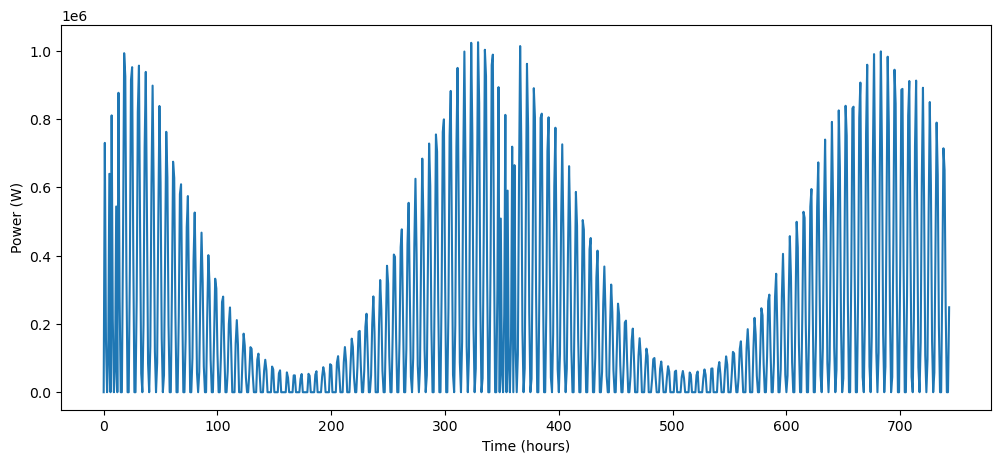

In [4]:
rho = 1025  # Density of seawater in kg/m^3
A = 165 # Cross-sectional area in m^2
eta = 0.45



P = np.zeros(len(v))
for i in range(len(v)):
    if abs(v[i]) < 1:
        P[i] = 0
    elif abs(v[i]) > 3:
        P[i] = 0
    else:
        P[i] = abs(0.5 * rho * A * v[i]**3)* eta



plt.figure(figsize=(12,5))
plt.plot(t[:31*24], P[:31*24])
plt.xlabel('Time (hours)')
plt.ylabel('Power (W)')


In [5]:
# Annual mean Power and max power

P_mean =  np.mean(P) / 1e6  # in MW
print(f'Annual Mean Power: {P_mean:.2f} MW')
P_max = np.max(P) / 1e6  # in MW
print(f'Maximum Power: {P_max:.2f} MW')

Annual Mean Power: 0.18 MW
Maximum Power: 1.02 MW


In [6]:
# Capacity Factor

P_rated = 1 # in MW
CF = P_mean / P_rated
CF = np.sum(P) / (P_rated *1e6*8760)
print(f'Capacity Factor: {CF:.2f}')

Capacity Factor: 0.18


### Part 2: Operation of a tidal rage powerplant

In [7]:
eta_sea = data['Tidal range Y(t) (m)'].values

t = data['Total hour'].values
eta = 0.9
n = 10
Q_0 = 0
Q_out = -n * 500 
Cd = 1
g = 9.81
A = 500
D = 7
At = np.pi * D**2 /4
As = A + n * At
A_bas = 10e6 #m2
Hse = 3 #m
Hee = 1 #m


Z = [eta_sea[0]]
Q = []
H = []
P = []
Generating = False
for i in range(len(eta_sea)):
    H.append(eta_sea[i] - Z[i])
    if H[i] > 0:
        if abs(H[i]) < Hee:
            Q.append(Q_0)
            P.append(0)

        else:
            Q.append(Cd * As * np.sqrt(2 * g * H[i]))
            P.append(0)


    elif H[i] <= 0:
        if Generating==False and abs(H[i]) > Hse:
            Q.append(Q_out)
            P.append(rho * g * H[i] * (Q[i]) * eta)  # in Watts

        elif Generating == True and abs(H[i]) > Hee:
            Q.append(Q_out)
            P.append(rho * g * H[i] * (Q[i]) * eta)  # in Watts

        else:
            Q.append(Q_0)           
            P.append(0)

    if P[i] > 0:
        Generating = True
    else:
        Generating = False
  
    Z.append(Z[i] + Q[i] / A_bas * (t[1]-t[0])*3600)




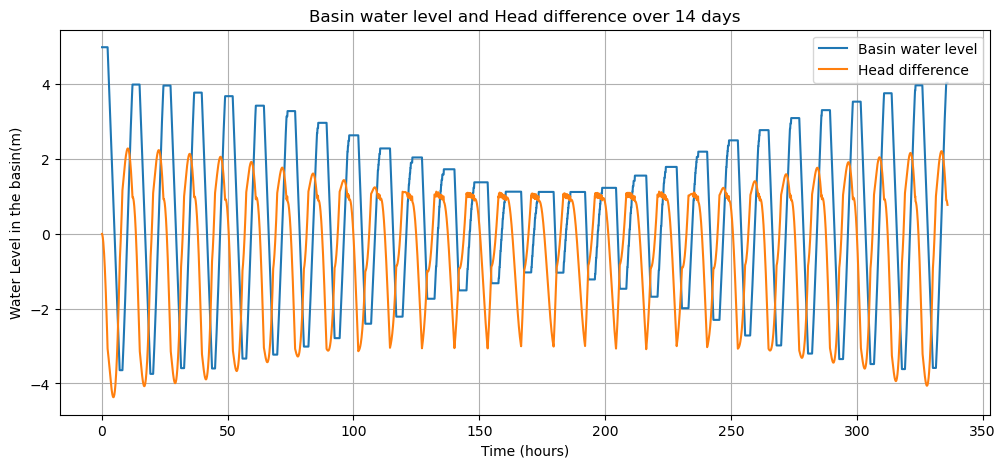

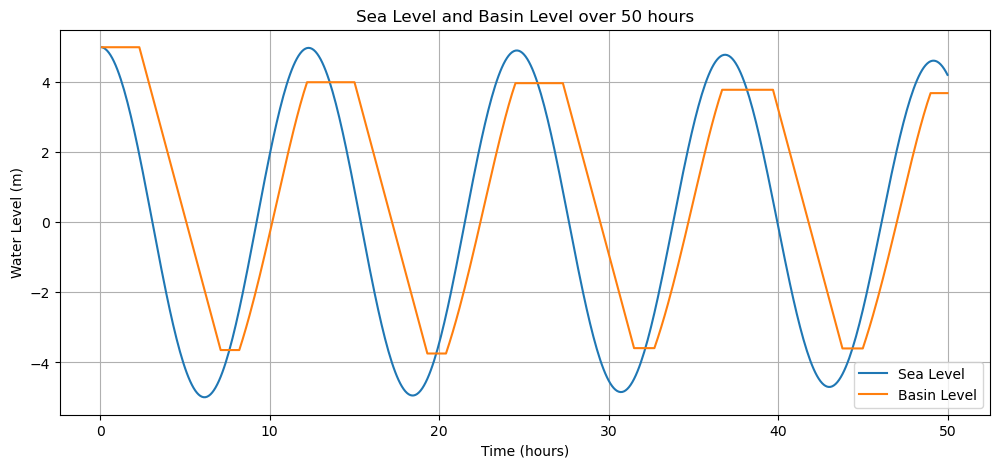

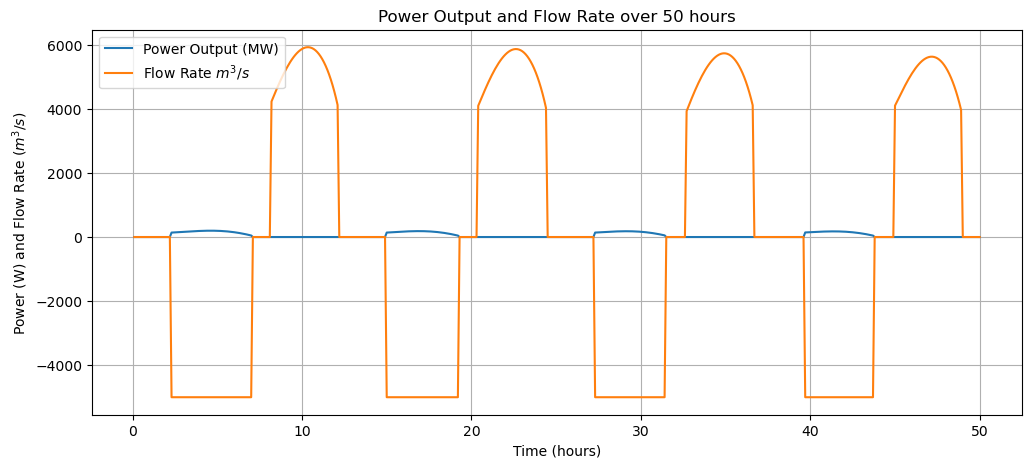

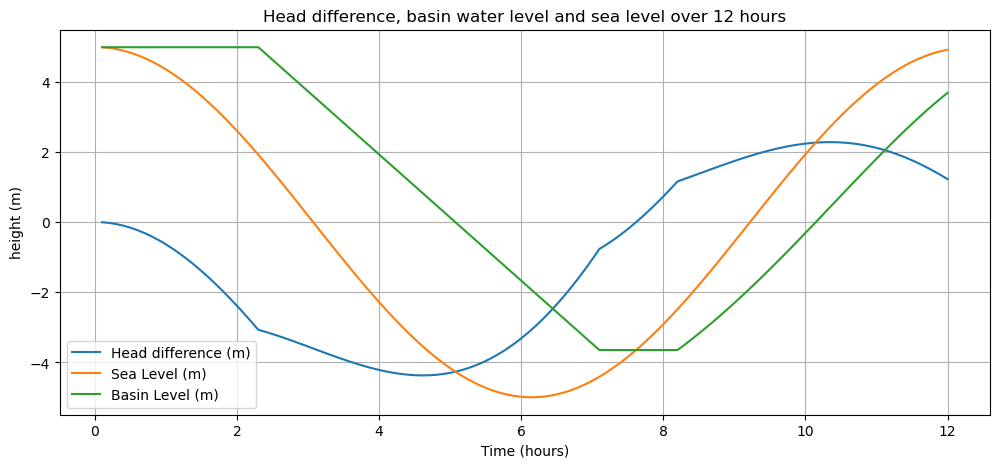

In [8]:
plt.figure(figsize=(12,5))
plt.plot(t, Z[:-1], label='Basin water level')
plt.plot(t, H, label='Head difference')
plt.xlabel('Time (hours)')
plt.ylabel('Water Level in the basin(m)')
plt.title('Basin water level and Head difference over 14 days')
plt.grid()
plt.legend()


plt.figure(figsize=(12,5))
plt.plot(t[0:500], eta_sea[0:500], label='Sea Level')
plt.plot(t[0:500], Z[0:500], label='Basin Level')
plt.xlabel('Time (hours)')
plt.ylabel('Water Level (m)')
plt.title('Sea Level and Basin Level over 50 hours')
plt.legend()
plt.grid()


plt.figure(figsize=(12,5))
plt.plot(t[:500], np.array(P[:500]) / 1e6, label='Power Output (MW)')
plt.plot(t[:500], Q[:500], label='Flow Rate $m^3/s$')
plt.xlabel('Time (hours)')
plt.ylabel('Power (W) and Flow Rate ($m^3/s$)')
plt.title('Power Output and Flow Rate over 50 hours')
plt.legend()
plt.grid()


plt.figure(figsize=(12,5))
plt.plot(t[:120], H[:120], label='Head difference (m)')
plt.plot(t[:120], eta_sea[:120], label='Sea Level (m)')
plt.plot(t[:120], Z[:120], label='Basin Level (m)')
plt.xlabel('Time (hours)')
plt.ylabel('height (m)')
plt.title('Head difference, basin water level and sea level over 12 hours')
plt.legend()
plt.grid()



In [9]:
print([i for i, val in enumerate(P) if val != 0])
#21 #70
#148 192

[22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 55

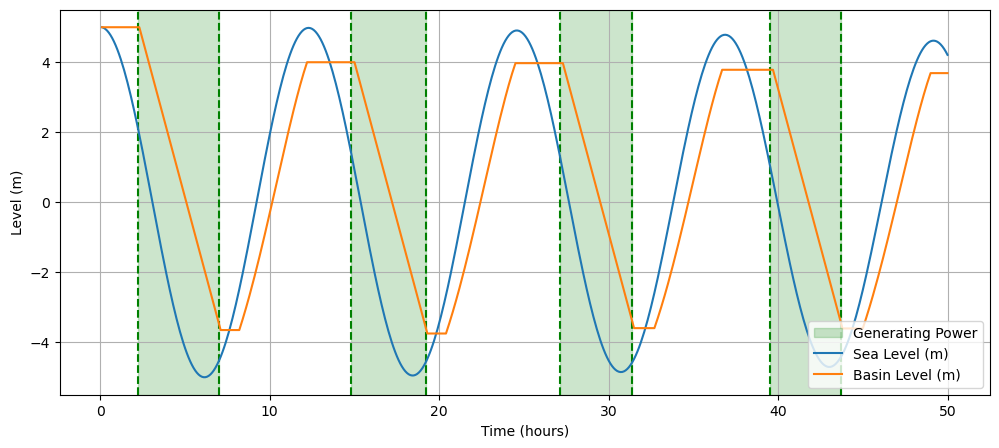

In [10]:
plt.figure(figsize=(12,5))
# plt.plot(t[0:240], np.array(P[0:240]) / 1e9, label='Power Output (GW)')

plt.axvline(x=2.2, color='g', linestyle='--')
plt.axvline(x=7.0, color='g', linestyle='--')
plt.axvspan(2.2, 7.0, color='green', alpha=0.2, label ='Generating Power')
plt.axvspan(14.8, 19.2, color='green', alpha=0.2)
plt.axvline(x=14.8, color='g', linestyle='--')
plt.axvline(x=19.2, color='g', linestyle='--')
plt.axvline(x=27.1, color='g', linestyle='--')
plt.axvline(x=31.4, color='g', linestyle='--')
plt.axvspan(27.1, 31.4, color='green', alpha=0.2)
plt.axvline(x=39.5, color='g', linestyle='--')
plt.axvline(x=43.7, color='g', linestyle='--')
plt.axvspan(39.5, 43.7, color='green', alpha=0.2)

# plt.plot(t[0:240], H[0:240], label='Head difference (m)')
plt.plot(t[0:500], eta_sea[0:500], label='Sea Level (m)')
plt.plot(t[0:500], Z[0:500], label='Basin Level (m)')
plt.xlabel('Time (hours)')
plt.ylabel('Level (m)')
plt.legend(loc='lower right')
plt.grid()

In [11]:
# Annual mean and max produced power

P_mean =  np.mean(P) / 1e6  # in MW
print(f'Annual Mean Power: {P_mean:.2f} MW')
P_max = np.max(P) / 1e6  # in MW
print(f'Maximum Power: {P_max:.2f} MW')



Annual Mean Power: 30.25 MW
Maximum Power: 197.72 MW


In [12]:
# Annual Energy yield and Capacity Factor
annual_energy_yield = np.trapezoid(P)*24.377 / 1e6 / 10  # to go from MW * 0.1h to MWh
print(f'Annual Energy Yield: {annual_energy_yield:.2f} MWh')

CF = annual_energy_yield / (200 *8760)  # Capacity Factor
print(f'Capacity Factor: {CF:.2f}')


Annual Energy Yield: 247728.12 MWh
Capacity Factor: 0.14
